# Previsões usando Arima

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import base_convert

In [6]:
base = base_convert.converter('./dados/AirPassengers.csv')
base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
ts = base['#Passengers']

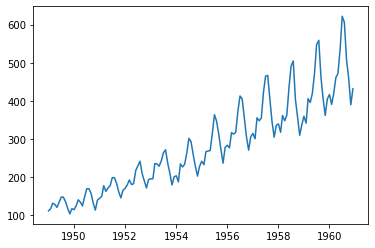

In [8]:
plt.plot(ts)

In [ ]:
Agora vamos criar o modelo arima, tendo como parametros: p = 2, q = 1 e d = 2 

In [12]:
model = ARIMA(ts, order=(2,1,2), freq=ts.index.inferred_freq)
trained_model = model.fit()
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.718
Date:                Wed, 23 Dec 2020   AIC                           1344.043
Time:                        20:23:33   BIC                           1361.821
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5309      0.708      3.573      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.929      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.876      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9095      0.065    -29.512      0.000      -2.036      -1.783
ma.L2.D.#Passengers     0.9994      0.067     14.815      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9060           -0.5281j            1.0487           -0.0840
AR.2            0.9060           +0.5281j            1.0487            0.0840
MA.1            0.9554           -0.2965j            1.0003           -0.0479
MA.2            0.9554           +0.2965j            1.0003            0.0479
-----------------------------------------------------------------------------
"""

Vamos prever!

In [15]:
prev = trained_model.forecast(steps= 12)[0]
prev

array([433.14991897, 450.94668301, 479.88695008, 512.05056773,
       539.39195702, 555.85660073, 558.7847129 , 549.29943759,
       531.6700575 , 511.90974321, 496.04412954, 488.53358392])

Vamos plotar!

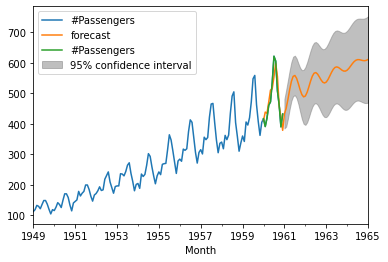

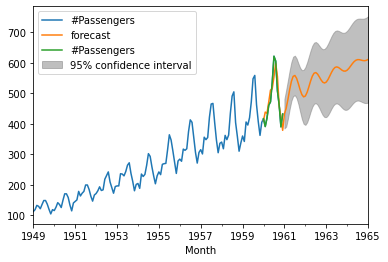

In [22]:
# Criação do eixo para a séria temporal e adicionar a partir do mopdel esse eixo.
eixo = ts.plot()
# Plot insample faz ir aos dados originais
trained_model.plot_predict('1960-01-01', '1965-01-01', ax = eixo, plot_insample= True)

In [28]:
auto_model = auto_arima(ts, m=12, seasonal=True, trace=False)

auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Wed, 23 Dec 2020   AIC                           1017.847
Time:                                     20:42:43   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.393
ma.L1         -0.9819      0.038    -25.600      0.000      -1.057      -0.907
sigma2       129.3143     14.557      8.883      0.000     100.784     157.845
===================================================================================
Ljung-Box (Q):                       47.73   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.19   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
next_12 = auto_model.predict(n_periods=12)
next_12

array([445.63517001, 420.39544419, 449.19890201, 491.8406432 ,
       503.39525661, 566.86329436, 654.26106676, 638.59841276,
       540.88469079, 494.1275864 , 423.33368515, 465.50855861])

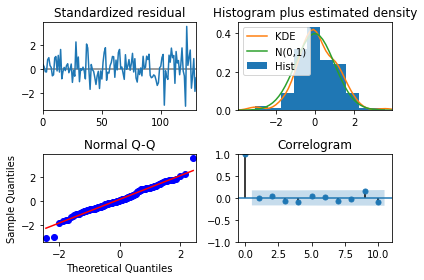

In [26]:
auto_model.plot_diagnostics()
plt.tight_layout()